Dataset contains seven features which consists of both ambient atmospheric conditons like Relative Humidity and ambient temperature of outside air and Air handling unit machine parameters like pressure, operating speed, supply Air temperature, Chilled water pipeline actuator percentage of opening and Relative Humidity to predict variable set point.

In [ ]:
#Importing data from google drive
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
#Giving path location 
train_path="/content/drive/My Drive/Project_data.xlsx"

In [ ]:
import pandas as pd
project_data = pd.read_excel(train_path) #reading data in excel format using pandas read

In [ ]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (460, 8)
--------------------------------------------------
The attributes of data : ['AHU_Pressure' 'AHU_Speed' 'AHU_RH' 'AHU_SAT' 'AHU_CHW_STS' 'AMB_TEMP'
 'AMB_RH' 'AHU_SP']


In [ ]:
##check missing values
project_data.isnull().sum()

AHU_Pressure    1
AHU_Speed       1
AHU_RH          1
AHU_SAT         1
AHU_CHW_STS     1
AMB_TEMP        0
AMB_RH          0
AHU_SP          1
dtype: int64

In [ ]:
#using describe for analysis of project data
project_data.describe()


,AHU_Pressure,AHU_Speed,AHU_RH,AHU_SAT,AHU_CHW_STS,AMB_TEMP,AMB_RH,AHU_SP
count,459.000000,459.000000,459.000000,459.000000,459.000000,460.000000,460.000000,459.000000
mean,68.677211,43.945512,61.705076,21.752026,30.349150,26.713348,68.808978,16.078257
std,42.713603,22.607884,5.188076,2.452894,24.722212,3.175642,22.960304,1.968174
min,0.000000,0.000000,44.070000,15.740000,0.000000,19.990000,0.300000,10.060000
25%,15.460000,32.310000,58.220000,20.085000,12.675000,24.357500,50.985000,14.295000
50%,100.000000,39.960000,61.460000,21.120000,23.650000,26.110000,70.950000,16.000000
75%,100.000000,63.100000,65.205000,23.425000,39.995000,27.982500,90.495000,16.475000
max,100.000000,100.000000,74.650000,29.080000,100.000000,36.160000,100.000000,22.000000


In [ ]:
#Filling Missing values with Mean values
project_data['AHU_Pressure']=project_data['AHU_Pressure'].fillna(68.6)
project_data['AHU_Speed']=project_data['AHU_Speed'].fillna(43.94)
project_data['AHU_RH']=project_data['AHU_RH'].fillna(61.70)
project_data['AHU_SAT']=project_data['AHU_SAT'].fillna(21.75)
project_data['AHU_CHW_STS']=project_data['AHU_CHW_STS'].fillna(30.34)
project_data['AHU_SP']=project_data['AHU_SP'].fillna(16.07)

In [ ]:
##check missing values
project_data.isnull().sum()

AHU_Pressure    0
AHU_Speed       0
AHU_RH          0
AHU_SAT         0
AHU_CHW_STS     0
AMB_TEMP        0
AMB_RH          0
AHU_SP          0
dtype: int64

In [ ]:
project_data.head()

,AHU_Pressure,AHU_Speed,AHU_RH,AHU_SAT,AHU_CHW_STS,AMB_TEMP,AMB_RH,AHU_SP
0,0.00,0.00,57.65,24.89,0.00,22.73,71.45,16.0
1,0.00,0.00,58.19,23.96,0.00,22.58,76.18,16.0
2,80.37,32.50,64.15,21.22,8.07,22.61,79.67,16.0
3,82.08,33.53,64.09,21.13,8.84,22.97,73.53,16.0
4,76.38,31.49,63.63,21.48,11.97,22.91,69.04,16.0


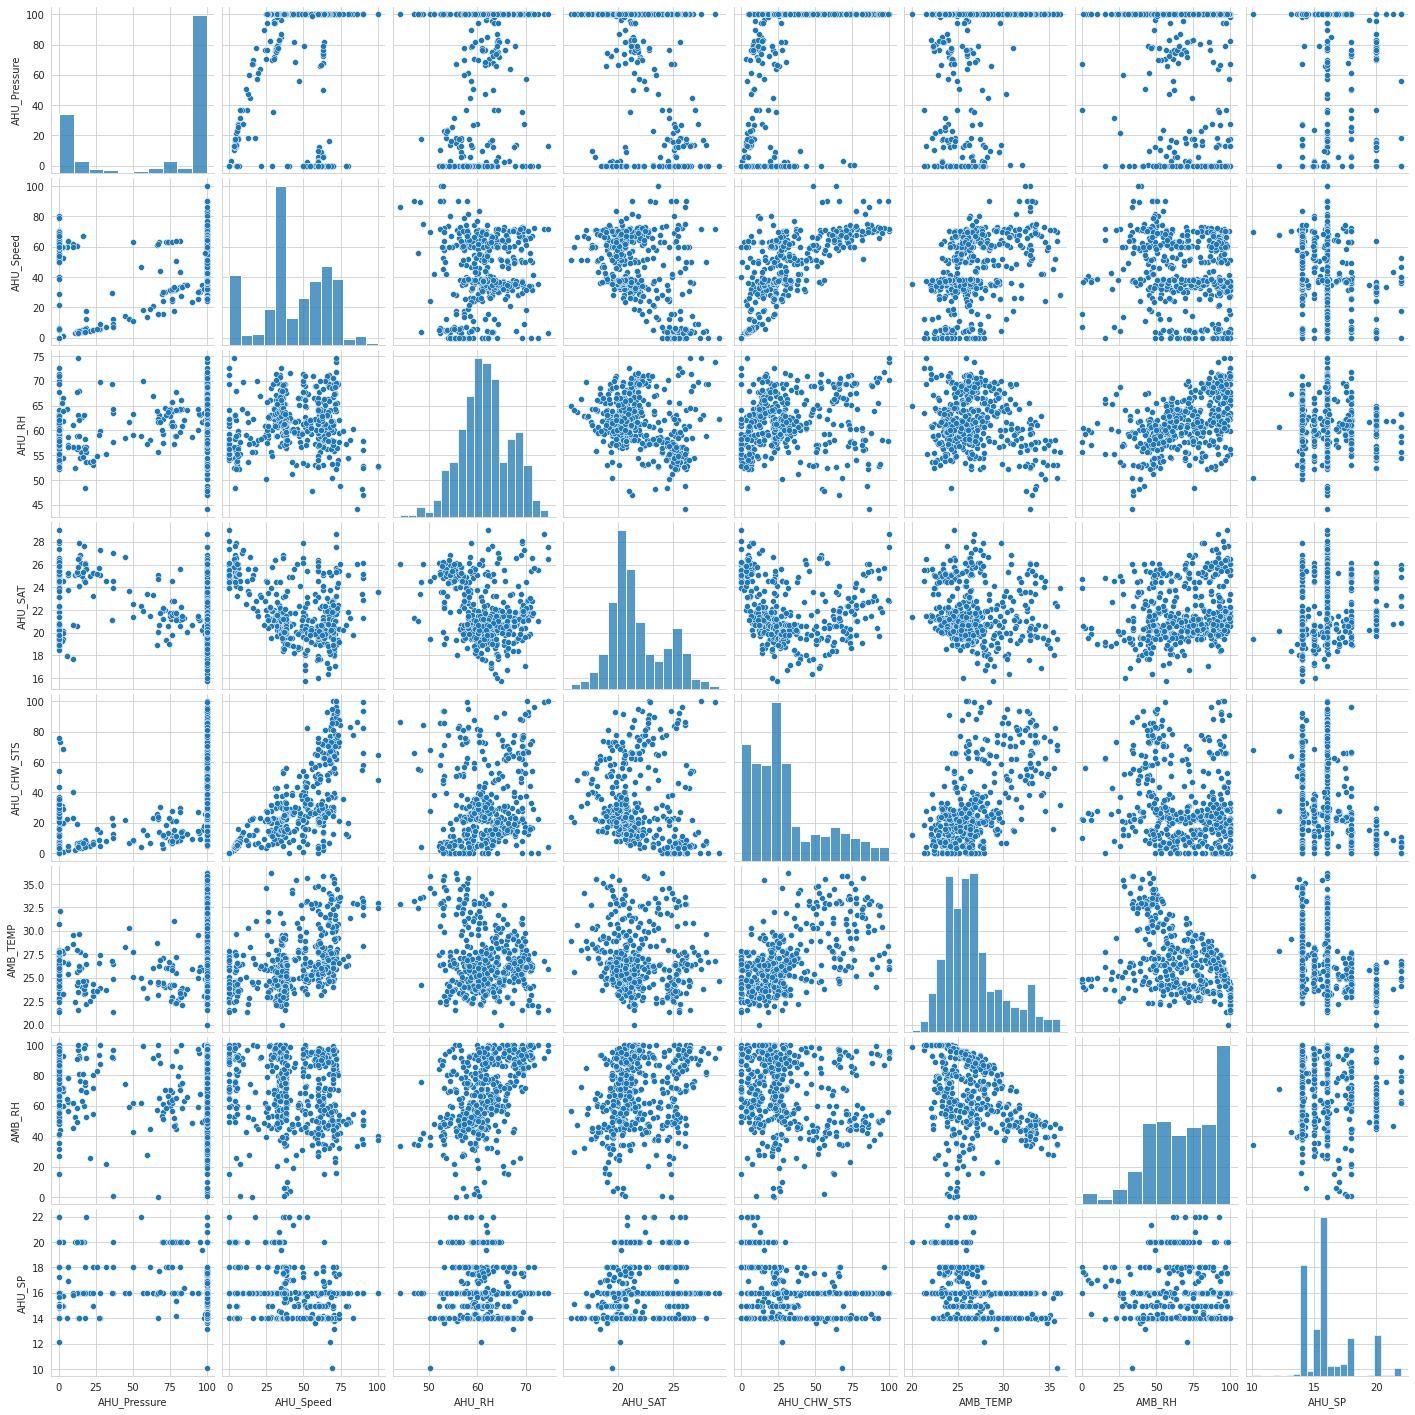

In [ ]:
#using seaborn pair plot to see relation between feature analysis
sns.pairplot(project_data)

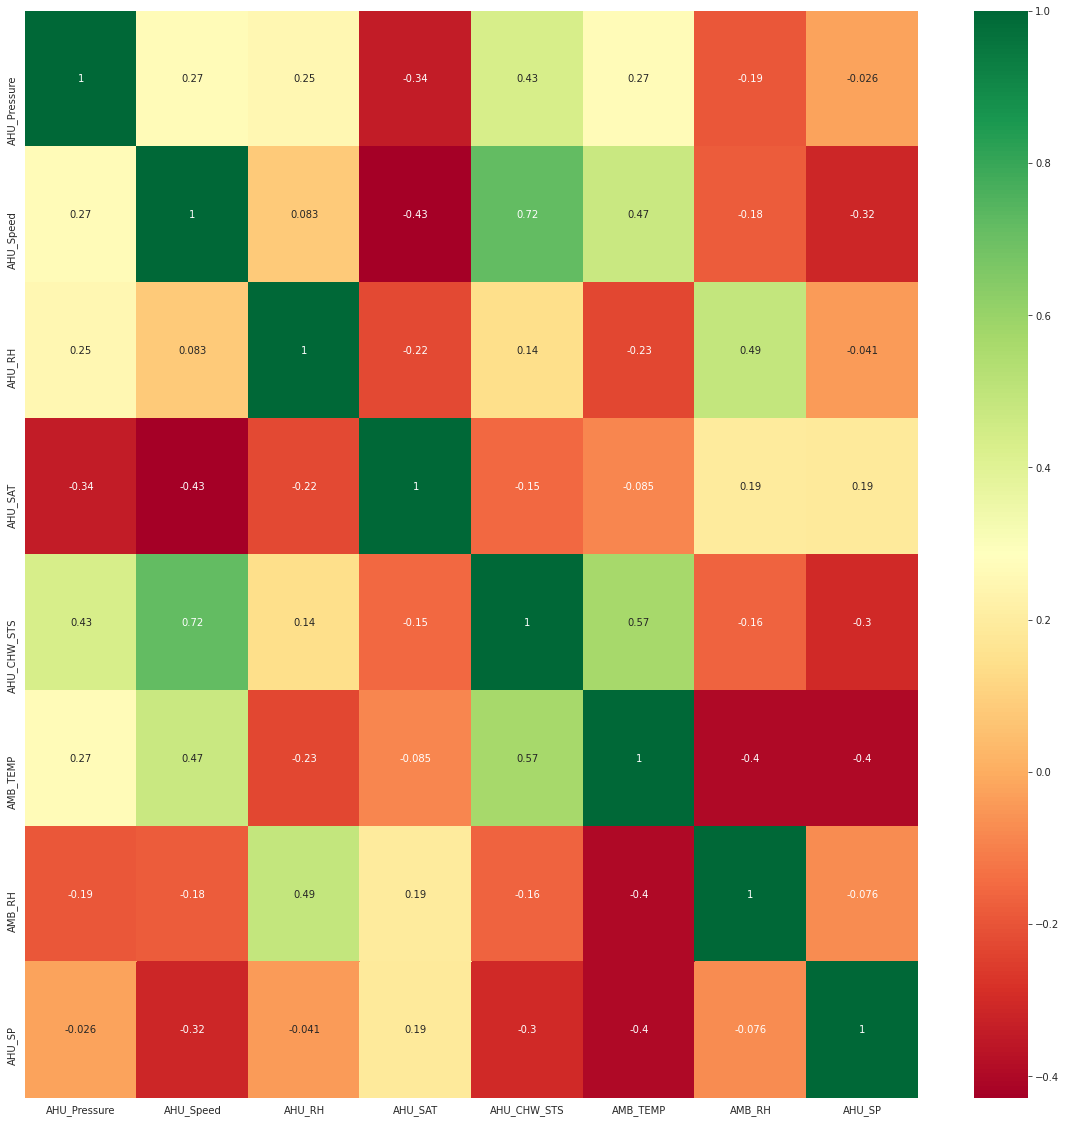

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = project_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(project_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#Dropping prediction variable from dataset
y = project_data['AHU_SP'].values
X = project_data.drop(['AHU_SP'], axis=1)
X.head(1)

,AHU_Pressure,AHU_Speed,AHU_RH,AHU_SAT,AHU_CHW_STS,AMB_TEMP,AMB_RH
0,0.0,0.0,57.65,24.89,0.0,22.73,71.45


In [ ]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [ ]:
print(model.feature_importances_)

[0.08708302 0.12429334 0.10846965 0.08036415 0.17563671 0.21760065
 0.20655247]


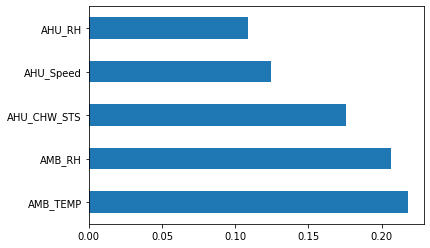

In [ ]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

**RandomForestRegressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   44.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
#best parameters
rf_random.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
#best score
rf_random.best_score_

-2.089919541406836

In [ ]:
predictions=rf_random.predict(X_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


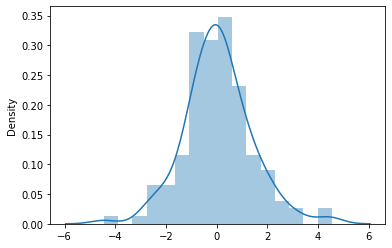

In [ ]:
import seaborn as sns
sns.distplot(y_test-predictions)

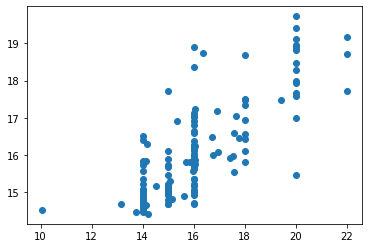

In [ ]:
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.9868490579710102
MSE: 1.8005124787746296
RMSE: 1.341831762470478


**GradientBoostingRegressor**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import datasets, ensemble

In [ ]:
rf1=ensemble.GradientBoostingRegressor()

In [ ]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf1_random = RandomizedSearchCV(estimator = rf1, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
rf1_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   0.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   0.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   24.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [ ]:
#best parameters
rf1_random.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
#best score
rf1_random.best_score_

-2.078266080137614

In [ ]:
predictions1=rf1_random.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions1))
print('MSE:', metrics.mean_squared_error(y_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))

MAE: 1.023274184408106
MSE: 1.8924409377206084
RMSE: 1.3756601825016992


**SUMMARY**

In [3]:
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Algorithm","MAX_DEPTH", "MIN_SAMPLE_SPLIT", "Error Value"]

x.add_row(["RandomForestRegressor","25","2", 0.98])
x.add_row(["GradientBoostingRegressor", "25", "2",1.02])
print(x)

+---------------------------+-----------+------------------+-------------+
|         Algorithm         | MAX_DEPTH | MIN_SAMPLE_SPLIT | Error Value |
+---------------------------+-----------+------------------+-------------+
|   RandomForestRegressor   |     25    |        2         |     0.98    |
| GradientBoostingRegressor |     25    |        2         |     1.02    |
+---------------------------+-----------+------------------+-------------+


Reference:


1)https://www.primexvents.com/why-machine-learning-is-the-future-of-hvac-and-building-management/

2)https://www.linkedin.com/pulse/machine-learning-hvac-controls-mike-donlon/

3)https://www.frontiersin.org/articles/10.3389/fbuil.2020.00049/full

4)https://www.ibm.com/blogs/research/2018/07/reduce-energy-cooling/

5)https://www.youtube.com/watch?v=VpHv8SZE0eI